In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader as pdr

## 获取数据并且计算daily return

              Adj Close    return
Date                             
2017-06-26  2439.070068  0.000316
2017-06-27  2419.379883 -0.008106
2017-06-28  2440.689941  0.008770
2017-06-29  2419.699951 -0.008637
2017-06-30  2423.409912  0.001532


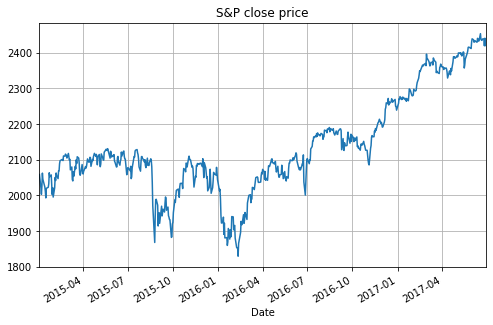

In [2]:
start = datetime(2015,1,1)
end = datetime(2017,6,30)
S_P = pdr.get_data_yahoo('^GSPC',start = start, end = end)
#print(S_P.head())
S_P['Adj Close'].plot(figsize = (8,5), grid = True, title = 'S&P close price')  #必备代码
#plt.show()   
S_P['return'] = np.log(S_P['Adj Close']/S_P['Adj Close'].shift(1))  #SMA：连续收益计算方法，这其实就是log(Pt/P(t-1))
print(S_P[['Adj Close','return']].tail())  #注意如果我们要看两列，那么外面是一个方括号，而方括号里面需要有一个list

## 然后我们想把close price和daily return绘图

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000230CD57B248>,
      dtype=object)

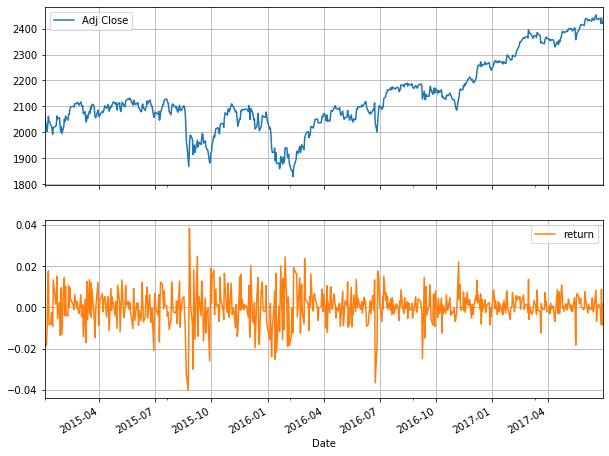

In [3]:
S_P[['Adj Close','return']].plot(subplots = True,figsize=(10,8),grid = True)   #如果这里我们不用subplots那么其实就会发现，daily return孤孤单单在图的最下面，基本等于没变化，所以为了看出差别，我们需要用子图
#plt.show()
#通过图我们看出一个现象就是，当我们市场价格开始下跌的时候我们的daily return的波动会特别大
#这种波动是很像一个clustering，高波动率出现的时候往往跟着高波动，低波动率出现的时候往往跟着一个低波动率

## 计算20天股价的移动平均，必背：SMA策略之后会重点展开

In [4]:
S_P['SMA20'] =S_P['Adj Close'].rolling(window = 20).mean()  #这里面window其实就是再问我们，我们是要算20天还是60天的移动平均
print(S_P.tail())

                   High          Low         Open        Close      Volume  \
Date                                                                         
2017-06-26  2450.419922  2437.030029  2443.320068  2439.070068  3238970000   
2017-06-27  2440.149902  2419.379883  2436.340088  2419.379883  3563910000   
2017-06-28  2442.969971  2428.020020  2428.699951  2440.689941  3500800000   
2017-06-29  2442.729980  2405.699951  2442.379883  2419.699951  3900280000   
2017-06-30  2432.709961  2421.649902  2429.199951  2423.409912  3361590000   

              Adj Close    return        SMA20  
Date                                            
2017-06-26  2439.070068  0.000316  2433.460510  
2017-06-27  2419.379883 -0.008106  2433.784009  
2017-06-28  2440.689941  0.008770  2435.228503  
2017-06-29  2419.699951 -0.008637  2434.710498  
2017-06-30  2423.409912  0.001532  2433.927490  


## 然后可以将收盘价和移动平均的价格进行比较

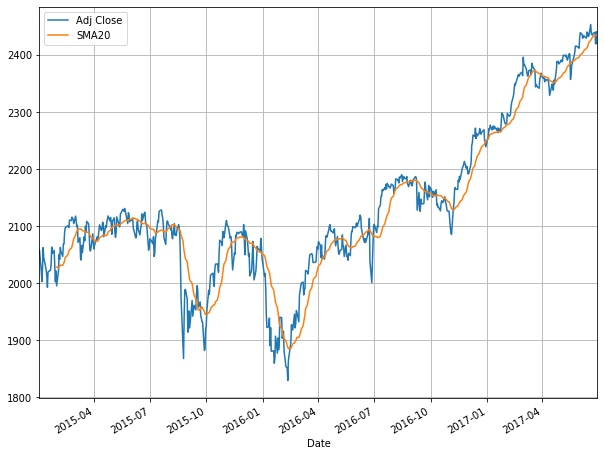

In [5]:
S_P[['Adj Close','SMA20']].plot(figsize=(10,8),grid = True)
#plt.show()

## 计算60日的移动均线

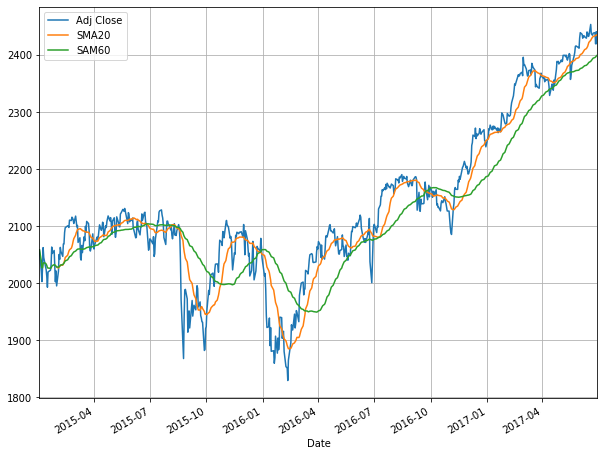

In [6]:
S_P['SAM60'] = S_P['Adj Close'].rolling(window = 60,min_periods = 0).mean()  #按照移动平均的逻辑，其实第一个数据并不是在我们日期范围的第一天出现，而是在第30天出现，但是如果加了min_periods = 0，那么相当于有几天的数据，那么就有几天的移动平均数据，而如果是min_periods = 5，那么前4个数据为NaN,但是第五个数据出现，可是直到到30天才是正常算移动平均
S_P[['Adj Close','SMA20','SAM60']].plot(figsize=(10,8),grid = True)
plt.show()